In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# import dataset
data=pd.read_csv("wc.at.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
data.shape

(109, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [6]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [7]:
# Check for null values
data.isna().sum()

Waist    0
AT       0
dtype: int64

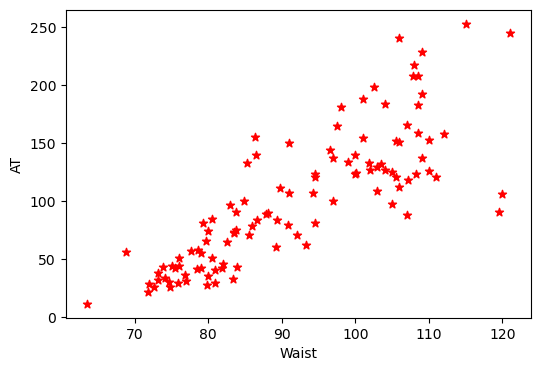

In [8]:
# draw a scatter plot
plt.figure(figsize=(6,4))
plt.scatter(data.Waist,data.AT,marker = '*', c='red')
plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()

In [9]:
# find the correlation
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


### Model Building

In [10]:
reg_model=linear_model.LinearRegression()
reg_model.fit(data[['Waist']],data.AT)

LinearRegression()

In [11]:
print(reg_model.coef_)
print(reg_model.intercept_)

[3.45885939]
-215.98148796164242


The equation of this Linear Regression model is,

### AT = -215.98 + 3.45 * Waist

In [12]:
# prediction using the model
reg_model.predict([[85],[75]])

array([78.02156036, 43.43296644])

## Multiple Linear Reagression



In [13]:
homedata=pd.read_csv('homeprices.csv')
homedata.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


#### Data Preprocessing

In [14]:
# Replacing null values with median
med =homedata.bedrooms.median()
homedata.bedrooms=homedata.bedrooms.fillna(med)
homedata

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


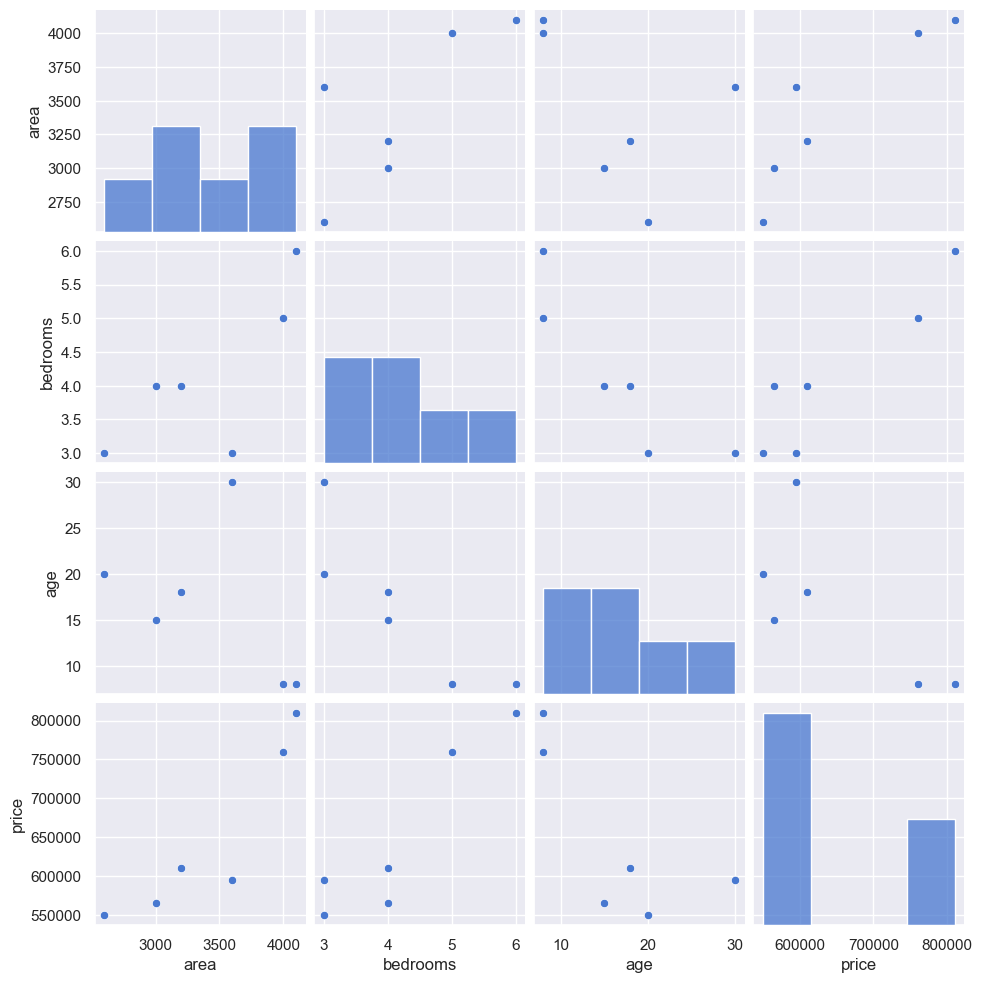

In [15]:
sns.set(style="darkgrid", palette="muted")
sns.pairplot(homedata)
plt.show()

In [16]:
corr_matrix = homedata.corr()
corr_matrix

,area,bedrooms,age,price
area,1.000000,0.751710,-0.445300,0.901476
bedrooms,0.751710,1.000000,-0.877221,0.919803
age,-0.445300,-0.877221,1.000000,-0.734167
price,0.901476,0.919803,-0.734167,1.000000


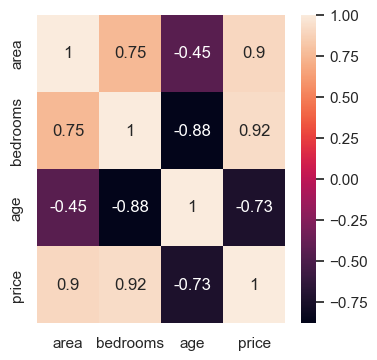

In [17]:
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
model = linear_model.LinearRegression()
model.fit(homedata[['area','bedrooms','age']],homedata.price)

LinearRegression()

In [19]:
print('Model coefficients : ',model.coef_)
print('Model Intercept : ',model.intercept_)

Model coefficients :  [  112.06244194 23388.88007794 -3231.71790863]
Model Intercept :  221323.00186540408


### Price = 221323.00 + 112.06 * Area + 23388.88 * Bedrooms + -3231.71 * Age

In [20]:
model.predict([[3500,4,13]])

array([665084.7361624])

In [21]:
predictions = model.predict(homedata[['area','bedrooms','age']])

residuals = homedata.price-predictions

residuals

0    31782.367024
1   -37590.079374
2    -5307.414037
3    -2962.895832
4     -663.426755
5    14741.448973
Name: price, dtype: float64

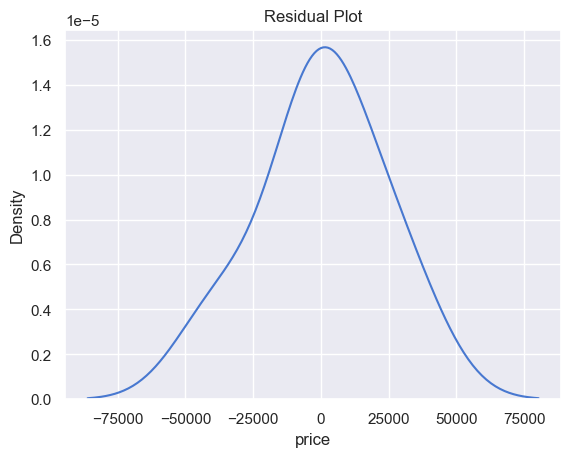

In [22]:
sns.distplot(residuals,hist=False)
plt.title('Residual Plot')
plt.show()

In [23]:
# Coefficient of determination
model.score(homedata[['area','bedrooms','age']],homedata.price)

0.9550196399325818

In [24]:
r2_score(homedata.price, predictions)

0.9550196399325818

In [25]:
# mean squared error of model
mean_squared_error(homedata.price, predictions)

446305128.22449446

## Label encoding

#### 1. Dummy Variables

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


house=pd.read_csv('house-prices.csv')
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [27]:
house.shape

(128, 8)

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [29]:
house = house.drop('Brick',axis=1)
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,1,114300,1790,2,2,2,East
1,2,114200,2030,4,2,3,East
2,3,114800,1740,3,2,1,East
3,4,94700,1980,3,2,3,East
4,5,119800,2130,3,3,3,East


In [30]:
dummies=pd.get_dummies(house.Neighborhood)
dummies

,East,North,West
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
123,True,False,False
124,True,False,False
125,False,True,False
126,False,False,True


In [31]:
merge=pd.concat([house,dummies],axis=1)
merge=merge.drop(['Neighborhood','Home'],axis=1)
merge.head()


,Price,SqFt,Bedrooms,Bathrooms,Offers,East,North,West
0,114300,1790,2,2,2,True,False,False
1,114200,2030,4,2,3,True,False,False
2,114800,1740,3,2,1,True,False,False
3,94700,1980,3,2,3,True,False,False
4,119800,2130,3,3,3,True,False,False


#### Train  model

In [32]:
x=merge.drop(['Price'],axis=1)
y=merge.Price

In [33]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [34]:
model.predict([[3000,3,3,2,1,0,0]])

array([188955.51847455])

### 2. Label Encoding

In [35]:
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood
0,1,114300,1790,2,2,2,East
1,2,114200,2030,4,2,3,East
2,3,114800,1740,3,2,1,East
3,4,94700,1980,3,2,3,East
4,5,119800,2130,3,3,3,East


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_le = le.fit_transform(house.Neighborhood)
data_le

array([0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1,
       1, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1])

In [37]:
le_df = pd.DataFrame(data_le,columns=['Neighbourhood_Label'])
le_df

,Neighbourhood_Label
0,0
1,0
2,0
3,0
4,0
...,...
123,0
124,0
125,1
126,2


In [38]:
data_new = pd.concat([house, le_df],axis=1)
data_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighborhood,Neighbourhood_Label
0,1,114300,1790,2,2,2,East,0
1,2,114200,2030,4,2,3,East,0
2,3,114800,1740,3,2,1,East,0
3,4,94700,1980,3,2,3,East,0
4,5,119800,2130,3,3,3,East,0


In [39]:
data_new = data_new.drop(['Home','Neighborhood'],axis=1)
data_new.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Neighbourhood_Label
0,114300,1790,2,2,2,0
1,114200,2030,4,2,3,0
2,114800,1740,3,2,1,0
3,94700,1980,3,2,3,0
4,119800,2130,3,3,3,0


In [40]:
X = data_new.drop('Price', axis=1)

Y = data_new.Price

In [41]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X,Y)

LinearRegression()

In [42]:
print(lr_model.coef_)
print(lr_model.intercept_)

[    61.69513871   6264.38455748  11836.35876598 -12153.48673407
   8511.86750749]
-17684.0098220862


In [43]:
lr_model.predict([[2800,3,4,3,2]])

array([201764.24211127])

### Split the data to Train and Test

In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
car_data = pd.read_csv('carprices.csv')
car_data.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [46]:
car_data.shape

(13, 4)

In [47]:
x = car_data[['Mileage','Age(yrs)']]
y = car_data[['Sell Price($)']]

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=.2)

In [48]:
xtrain

,Mileage,Age(yrs)
4,46000,4
12,59000,5
9,67000,6
5,59000,5
7,72000,6
8,91000,8
11,79000,7
6,52000,5
0,69000,6
2,57000,5


In [49]:
ytrain

,Sell Price($)
4,31500
12,33000
9,22000
5,29400
7,19300
8,12000
11,21000
6,32000
0,18000
2,26100


In [50]:
model_new=linear_model.LinearRegression()
model_new.fit(xtrain,ytrain)

LinearRegression()

In [51]:
ytrain_pred = model_new.predict(xtrain)
ytrain_pred

array([[33494.30935495],
       [27257.86896319],
       [23584.1607565 ],
       [27257.86896319],
       [21021.42857143],
       [12136.37284701],
       [17860.26680176],
       [30845.69402229],
       [22559.06788247],
       [28282.96183722]])

In [52]:
training_error = mean_squared_error(ytrain,ytrain_pred)
training_error

8377031.239446136

<Axes: ylabel='Density'>

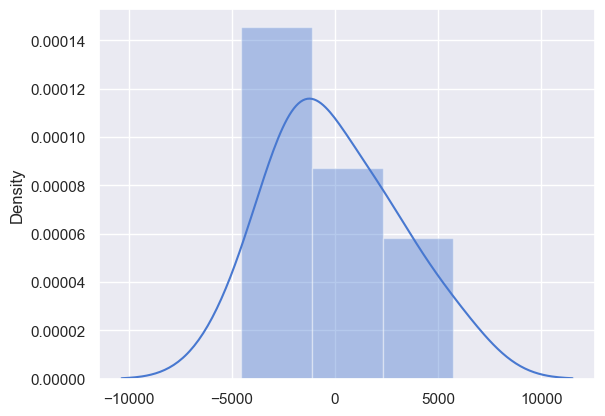

In [53]:
residuals = ytrain-ytrain_pred

sns.distplot(residuals)

In [54]:
ytest_pred = model_new.predict(xtest)
ytest_pred

array([[44685.82404593],
       [15810.0810537 ],
       [38705.65687268]])

In [55]:
testing_error = mean_squared_error(ytest,ytest_pred)
testing_error

20551858.12312761

In [56]:
model_new.score(xtrain,ytrain)

0.8130381524067898